<h1>Match Prediction through Poisson Distribution</h1>

# Question to answer
Can we predict premier league match results solely on the history of how many goals each team scored from when they were playing away and home?

I will attempt to answer the question above using some simple statistical distributions. Mainly the poisson distribution which is a probability distribution that describes the number of events that occur within a fixed interval of time or space. So based on the 

# Cleaning Match Results data
The data was given from kaggle, and therefore did not have much cleaning to do. However, tidying the data was necesary for future use.
The data given from different seasons were each given in separate csv files and contained different columns.
Therefore finding the set of columns that appeared in all dataframes and joining them togeether was necessary.
The only columns that had different data formats over each csv was the date format. All dates were modified to be the YYYY-MM-DD format.

In [11]:
import pandas as pd

df_10 = pd.read_csv('./Datasets/2010-11.csv')
df_11 = pd.read_csv('./Datasets/2011-12.csv')
df_12 = pd.read_csv('./Datasets/2012-13.csv')
df_13 = pd.read_csv('./Datasets/2013-14.csv')
df_14 = pd.read_csv('./Datasets/2014-15.csv')
df_15 = pd.read_csv('./Datasets/2015-16.csv')
df_16 = pd.read_csv('./Datasets/2016-17.csv')
df_17 = pd.read_csv('./Datasets/2017-18.csv')
df_18 = pd.read_csv('./Datasets/2018-19.csv')
df_19 = pd.read_csv('./Datasets/2019-20.csv')
df_20 = pd.read_csv('./Datasets/2020-21.csv')
df_21 = pd.read_csv('./Datasets/2021-22.csv')


# Add season column for future use
for z in range(10,22):
    exec(f'df_{z}["Season"] = {z}')


# Only concatenate columns that all dataframes have
a = df_10.columns
b = df_11.columns
c = df_12.columns
d = df_13.columns
e = df_14.columns
f = df_15.columns
g = df_16.columns
h = df_17.columns
i = df_18.columns
j = df_19.columns
k = df_20.columns
l = df_21.columns

common_columns =list(set(a).intersection(b,c,d,e,f,g,h,i,j,k,l))

for i in range(10,22):
    exec(f'mod_{i} = df_{i}[common_columns]')

final_df = pd.concat([mod_10,mod_11,mod_12,mod_13,mod_14,mod_15,mod_16,mod_17,mod_18,mod_19,mod_20,mod_21])



# Make all date format the same
final_df['Date'] = pd.to_datetime(final_df['Date'])
final_df.columns.sort_values()


C:\Users\JaeHoBahng\AppData\Local\Temp\ipykernel_22172\2869723453.py:46: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  final_df['Date'] = pd.to_datetime(final_df['Date'])


Index(['AC', 'AF', 'AR', 'AS', 'AST', 'AY', 'AwayTeam', 'B365A', 'B365D',
       'B365H', 'BWA', 'BWD', 'BWH', 'Date', 'Div', 'FTAG', 'FTHG', 'FTR',
       'HC', 'HF', 'HR', 'HS', 'HST', 'HTAG', 'HTHG', 'HTR', 'HY', 'HomeTeam',
       'IWA', 'IWD', 'IWH', 'Referee', 'Season', 'VCA', 'VCD', 'VCH', 'WHA',
       'WHD', 'WHH'],
      dtype='object')

### Sources that provide odds for match results
Based on the column names printed above and using the "Dataset-Explanation.txt" file, we can tell that we have 5 sources in the merged dataset that predict the odds of the outcome of the matches. Since we will 
 - B365 = Bet365
 - BW = Bet&Win
 - IW = Interwetten
 - WH = William Hill
 - VC = VC Bet

## Forming Final dataset
For out final dataset, we will only keep columns necessary for our analysis. We will only use the odds predicted by B365 for convenience, and will keep essential information such as the season, hometeam, away team, results, goals scored, date etc.

In [10]:

final_df_mod = final_df[['Season','HomeTeam','AwayTeam','Referee','FTR','FTHG','FTAG','Date','B365H','B365A','B365D']]
output_path = './results_MOD.csv'
final_df_mod.to_csv(output_path, index=False)
final_df_mod.head(20)

,Season,HomeTeam,AwayTeam,Referee,FTR,FTHG,FTAG,Date,B365H,B365A,B365D
0,10,Aston Villa,West Ham,M Dean,H,3,0,2010-08-14,2.00,4.00,3.30
1,10,Blackburn,Everton,P Dowd,H,1,0,2010-08-14,2.88,2.50,3.25
2,10,Bolton,Fulham,S Attwell,D,0,0,2010-08-14,2.20,3.40,3.30
3,10,Chelsea,West Brom,M Clattenburg,H,6,0,2010-08-14,1.17,17.00,7.00
4,10,Sunderland,Birmingham,A Taylor,D,2,2,2010-08-14,2.10,3.60,3.30
5,10,Tottenham,Man City,A Marriner,D,0,0,2010-08-14,2.40,3.00,3.30
6,10,Wigan,Blackpool,M Halsey,A,0,4,2010-08-14,1.83,4.50,3.50
7,10,Wolves,Stoke,L Probert,H,2,1,2010-08-14,2.30,3.20,3.25
8,10,Liverpool,Arsenal,M Atkinson,D,1,1,2010-08-15,2.50,2.88,3.25
9,10,Man United,Newcastle,C Foy,H,3,0,2010-08-16,1.25,15.00,5.50


### Question!!
By looking at the dataset, one question came into mind.</br>
Do the predictions made by B365 every predict a draw..? It seems the lowest odds are correlated to the actual results of the match. For example if B365H is the lowest out of the three columns (B365H, B365A, and B365D), they are actually predicting that the home team would win.

Lets find out if they predict any draws!

In [42]:
min_column = final_df_mod[['B365H','B365A','B365D']].idxmin(axis=1)
draws_predicted = sum(min_column.str[-1] == 'D')
print("Number of Draws predicted by B365: ", draws_predicted)

Number of Draws predicted by B365:  0


There were no draws predicted! 

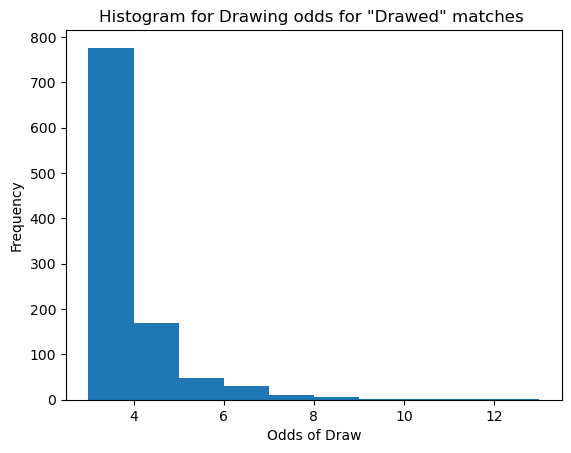

In [30]:
import matplotlib.pyplot as plt
A = final_df_mod[final_df_mod['FTR']=='D'].B365A
D = final_df_mod[final_df_mod['FTR']=='D'].B365D
H = final_df_mod[final_df_mod['FTR']=='D'].B365H
plt.hist(D)
plt.xlabel('Odds of Draw')
plt.ylabel('Frequency')
plt.title('Histogram for Drawing odds for "Drawed" matches ')
plt.show()

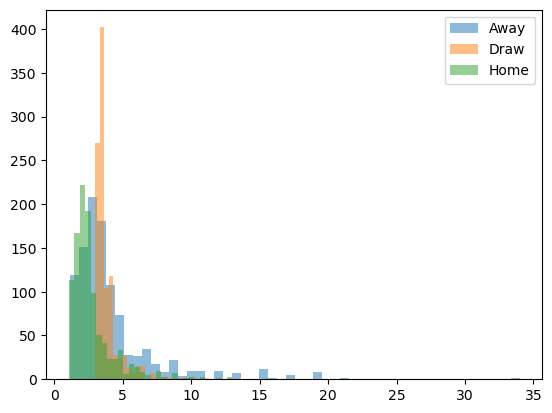

In [34]:
plt.hist(A, bins=50, alpha=0.5, label='Away')
plt.hist(D, bins=30, alpha=0.5, label='Draw')
plt.hist(H, bins=30, alpha=0.5, label='Home')
plt.legend()

In [36]:
from scipy.stats import ttest_ind

t_statistic, p_value = ttest_ind(D, A,alternative='less')
p_value

0.0005110860089710148

In [38]:
A.mean()

4.177643678160919

In [39]:
D.mean()

3.8430459770114944

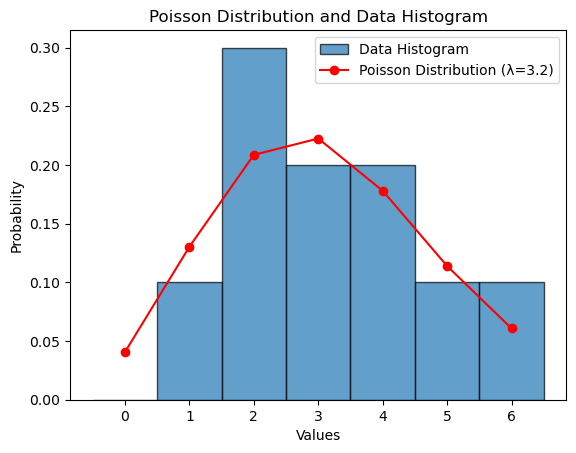

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Assuming you have a series of numbers
data = np.array([2, 3, 4, 2, 1, 5, 3, 4, 2, 6])

# Estimate the parameter lambda (mean of the data)
lambda_estimate = np.mean(data)

# Create a Poisson distribution with the estimated lambda
poisson_dist = poisson(mu=lambda_estimate)

# Generate x values for plotting
x_values = np.arange(0, np.max(data) + 1)

# Plot the histogram of the data
plt.hist(data, bins=np.arange(-0.5, np.max(data) + 1.5, 1), density=True, edgecolor='black', alpha=0.7, label='Data Histogram')

# Plot the PMF (Probability Mass Function) of the Poisson distribution
plt.plot(x_values, poisson_dist.pmf(x_values), 'ro-', label=f'Poisson Distribution (λ={lambda_estimate})')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Probability')
plt.title('Poisson Distribution and Data Histogram')

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import poisson, skellam
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [120]:
df = final_df_mod[['HomeTeam','AwayTeam','FTHG','FTAG']]
df = df.rename(columns={'FTHG':'HomeGoals','FTAG':'AwayGoals'})
df.head()

,HomeTeam,AwayTeam,HomeGoals,AwayGoals
0,Aston Villa,West Ham,3,0
1,Blackburn,Everton,1,0
2,Bolton,Fulham,0,0
3,Chelsea,West Brom,6,0
4,Sunderland,Birmingham,2,2


In [49]:
goal_model_data = pd.concat([df[['HomeTeam','AwayTeam','HomeGoals']].assign(home=1).rename(
    columns={'HomeTeam':'team','AwayTeam':'opponent','HomeGoals':'goals'}),
    df[['AwayTeam','HomeTeam','AwayGoals']].assign(home=0).rename(
        columns={'AwayTeam':'team','HomeTeam':'opponent','AwayGoals':'goals'})])

In [52]:
goal_model_data.head()

,team,opponent,goals,home
0,Aston Villa,West Ham,3,1
1,Blackburn,Everton,1,1
2,Bolton,Fulham,0,1
3,Chelsea,West Brom,6,1
4,Sunderland,Birmingham,2,1


In [54]:
poisson_model = smf.glm(formula="goals~home+team+opponent", data = goal_model_data, family=sm.families.Poisson()).fit()
poisson_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  goals   No. Observations:                 8440
Model:                            GLM   Df Residuals:                     8364
Model Family:                 Poisson   Df Model:                           75
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12225.
Date:                Thu, 14 Dec 2023   Deviance:                       9519.1
Time:                        17:43:57   Pearson chi2:                 8.29e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1485
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        0.2865      0.060      4.768      0.000       0.169       0.404
team[T.Aston Villa]             -0.4648      0.063     -7.322      0.000      -0.589      -0.340
team[T.Birmingham]              -0.6432      0.169     -3.810      0.000      -0.974      -0.312
team[T.Blackburn]               -0.3907      0.110     -3.559      0.000      -0.606      -0.176
team[T.Blackpool]               -0.2261      0.140     -1.613      0.107      -0.501       0.049
team[T.Bolton]                  -0.3509      0.108     -3.255      0.001      -0.562      -0.140
team[T.Bournemouth]             -0.3289      0.080     -4.095      0.000      -0.486      -0.171
team[T.Brentford]               -0.3328      0.149     -2.232      0.026      -0.625      -0.041
team[T.Brighton]                -0.5040      0.086     -5.869      0.000      -0.672      -0.336
team[T.Burnley]                 -0.6356      0.077     -8.212      0.000      -0.787      -0.484
team[T.Cardiff]                 -0.7096      0.150     -4.718      0.000      -1.004      -0.415
team[T.Chelsea]                  0.0068      0.051      0.132      0.895      -0.094       0.107
team[T.Crystal Palace]          -0.4622      0.065     -7.075      0.000      -0.590      -0.334
team[T.Everton]                 -0.2727      0.055     -4.932      0.000      -0.381      -0.164
team[T.Fulham]                  -0.4766      0.075     -6.320      0.000      -0.624      -0.329
team[T.Huddersfield]            -0.9052      0.166     -5.440      0.000      -1.231      -0.579
team[T.Hull]                    -0.6154      0.103     -5.976      0.000      -0.817      -0.414
team[T.Leeds]                   -0.2333      0.105     -2.226      0.026      -0.439      -0.028
team[T.Leicester]               -0.1155      0.061     -1.899      0.058      -0.235       0.004
team[T.Liverpool]                0.0637      0.051      1.261      0.207      -0.035       0.163
team[T.Man City]                 0.2192      0.049      4.503      0.000       0.124       0.315
team[T.Man United]              -0.0211      0.052     -0.410      0.682      -0.122       0.080
team[T.Middlesbrough]           -0.8976      0.196     -4.579      0.000      -1.282      -0.513
team[T.Newcastle]               -0.4172      0.060     -7.004      0.000      -0.534      -0.300
team[T.Norwich]                 -0.6175      0.078     -7.868      0.000      -0.771      -0.464
team[T.QPR]                     -0.5741      0.100     -5.728      0.000      -0.771      -0.378
team[T.Reading]                 -0.4653      0.157     -2.964      0.003      -0.773      -0.158
team[T.Sheffield United]        -0.8461      0.149     -5.679      0.000      -1.138      -0.554
team[T.Southampton]             -0.3521      0.060     -5.820      0.000    

In [59]:
home_team = 'Man City'
away_team = 'Wolves'

home_score_rate = poisson_model.predict(pd.DataFrame(data={'team': home_team, 'opponent': away_team, 'home':1}, index=[1]))
away_score_rate = poisson_model.predict(pd.DataFrame(data={'team': away_team, 'opponent': home_team, 'home':0}, index=[1]))

print(home_team + ' against ' + away_team + ' expect to score: ' + str(home_score_rate))
print(away_team + ' against ' + home_team + ' expect to score: ' + str(away_score_rate))

Man City against Wolves expect to score: 1    2.687892
dtype: float64
Wolves against Man City expect to score: 1    0.650189
dtype: float64


In [64]:
def simulate_match(foot_model, homeTeam, awayTeam, max_goals=10):
    home_goals_avg = foot_model.predict(pd.DataFrame(data={'team': homeTeam, 'opponent': awayTeam, 'home':1}, index=[1])).values[0]
    away_goals_avg = foot_model.predict(pd.DataFrame(data={'team': awayTeam, 'opponent': homeTeam, 'home':0}, index=[1])).values[0]
    team_pred = [[poisson.pmf(i, team_avg) for i in range(0,max_goals+1)] for team_avg in [home_goals_avg, away_goals_avg]]
    return (np.outer(np.array(team_pred[0]), np.array(team_pred[1])))


In [74]:
score_matrix = simulate_match(poisson_model, home_team, away_team, max_goals = 6)
score_matrix

array([[3.55050464e-02, 2.30849846e-02, 7.50479957e-03, 1.62651228e-03,
        2.64385030e-04, 3.43800386e-05, 3.72558618e-06],
       [9.54337164e-02, 6.20499364e-02, 2.01720878e-02, 4.37188872e-03,
        7.10638303e-04, 9.24098173e-05, 1.00139718e-05],
       [1.28257743e-01, 8.33917517e-02, 2.71101927e-02, 5.87558150e-03,
        9.55059366e-04, 1.24193786e-04, 1.34582354e-05],
       [1.14914304e-01, 7.47159966e-02, 2.42897532e-02, 5.26430874e-03,
        8.55698685e-04, 1.11273145e-04, 1.20580927e-05],
       [7.72192981e-02, 5.02071251e-02, 1.63220560e-02, 3.53747282e-03,
        5.75006329e-04, 7.47725384e-05, 8.10271155e-06],
       [4.15114207e-02, 2.69902620e-02, 8.77438345e-03, 1.90166870e-03,
        3.09110937e-04, 4.01960957e-05, 4.35584208e-06],
       [1.85963666e-02, 1.20911498e-02, 3.93076528e-03, 8.51913225e-04,
        1.38476116e-04, 1.80071247e-05, 1.95133856e-06]])

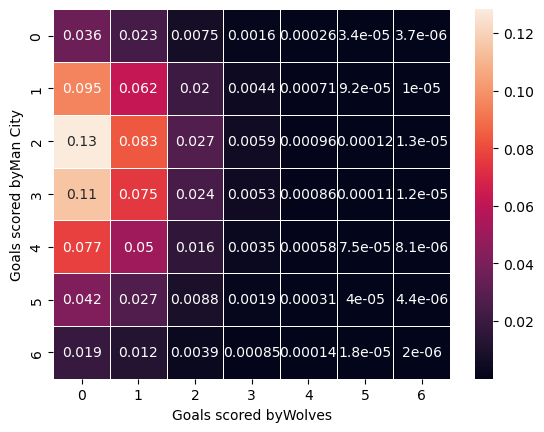

In [75]:
ax = sns.heatmap(score_matrix, linewidth=0.7, annot=True)
ax.set_xlabel('Goals scored by' + away_team)
ax.set_ylabel('Goals scored by' + home_team)

plt.show()

In [76]:
homewin = np.sum(np.tril(score_matrix, -1))
draw = np.sum(np.diag(score_matrix))
awaywin = np.sum(np.triu(score_matrix, 1))

print(home_team + 'win probability: ' + str(round(homewin*100, 2)) + '%')
print('draw probability: ' + str(round(draw*100, 2)) + '%')
print(away_team + 'win probability: ' + str(round(awaywin*100, 2)) + '%')

Man Citywin probability: 78.34%
draw probability: 13.05%
Wolveswin probability: 6.59%


In [84]:
def custom_function(row):
    home_team = row['HomeTeam']
    away_team = row['AwayTeam']

    score_matrix = simulate_match(poisson_model, home_team, away_team, max_goals = 6)

    homewin = np.sum(np.tril(score_matrix, -1))
    draw = np.sum(np.diag(score_matrix))
    awaywin = np.sum(np.triu(score_matrix, 1))

    variables = {'H':homewin, 'D':draw, 'A':awaywin}
    largest_variable = max(variables, key=variables.get)

    return largest_variable

In [ ]:
def custom_function(row):
    home_team = row['HomeTeam']
    away_team = row['AwayTeam']
    season = row['Season']

    score_matrix = simulate_match(poisson_model, home_team, away_team, max_goals = 6)

    homewin = np.sum(np.tril(score_matrix, -1))
    draw = np.sum(np.diag(score_matrix))
    awaywin = np.sum(np.triu(score_matrix, 1))

    variables = {'H':homewin, 'D':draw, 'A':awaywin}
    largest_variable = max(variables, key=variables.get)

    return largest_variable

In [116]:
df = final_df_mod[['Season','HomeTeam','AwayTeam','FTR']]
df.head()

,Season,HomeTeam,AwayTeam,FTR
0,10,Aston Villa,West Ham,H
1,10,Blackburn,Everton,H
2,10,Bolton,Fulham,D
3,10,Chelsea,West Brom,H
4,10,Sunderland,Birmingham,D


In [86]:
df['Prediction'] = df.apply(custom_function, axis=1)

C:\Users\JaeHoBahng\AppData\Local\Temp\ipykernel_22172\1028930162.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prediction'] = df.apply(custom_function, axis=1)


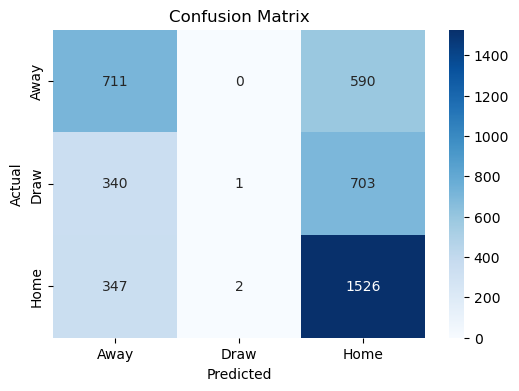

Precision: 0.48
Recall: 0.53
F1 Score: 0.45
Accuracy: 0.53


In [109]:
from sklearn.metrics import confusion_matrix
y_true = df['FTR']
y_pred = df['Prediction']
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Away', 'Draw', 'Home'],
            yticklabels=['Away', 'Draw', 'Home'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')
accuracy = accuracy_score(y_true, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")

C:\Users\JaeHoBahng\AppData\Local\Temp\ipykernel_22172\555292853.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FTR_mod'] = df['FTR'].apply(modify_column)
C:\Users\JaeHoBahng\AppData\Local\Temp\ipykernel_22172\555292853.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prediction_mod'] = df['Prediction'].apply(modify_column)


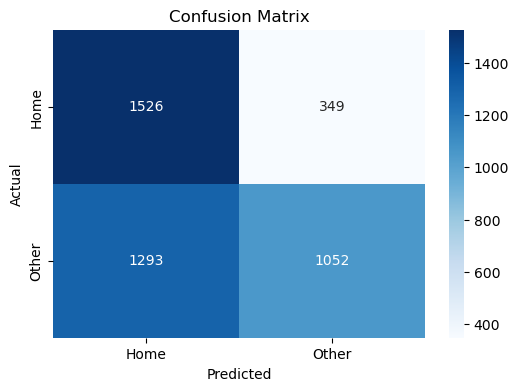

Precision: 0.66
Recall: 0.61
F1 Score: 0.60
Accuracy: 0.61


In [111]:
def modify_column(value):
    return 'H' if value == 'H' else 'X'

# Apply the custom function to the specified column
df['FTR_mod'] = df['FTR'].apply(modify_column)
df['Prediction_mod'] = df['Prediction'].apply(modify_column)

from sklearn.metrics import confusion_matrix
y_true = df['FTR_mod']
y_pred = df['Prediction_mod']

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Home', 'Other'],
            yticklabels=['Home', 'Other'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')
accuracy = accuracy_score(y_true, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")

In [115]:
sum(y_pred == 'H')

2819

In [123]:
df = final_df_mod[['Season','HomeTeam','AwayTeam','FTHG','FTAG']]
df = df.rename(columns={'FTHG':'HomeGoals','FTAG':'AwayGoals'})

goal_model_data = pd.concat([df[['Season','HomeTeam','AwayTeam','HomeGoals']].assign(home=1).rename(
    columns={'Season':'Season','HomeTeam':'team','AwayTeam':'opponent','HomeGoals':'goals'}),
    df[['Season','AwayTeam','HomeTeam','AwayGoals']].assign(home=0).rename(
        columns={'Season':'Season','AwayTeam':'team','HomeTeam':'opponent','AwayGoals':'goals'})])

In [131]:
goal_model_data.head()

,Season,team,opponent,goals,home
0,10,Aston Villa,West Ham,3,1
1,10,Blackburn,Everton,1,1
2,10,Bolton,Fulham,0,1
3,10,Chelsea,West Brom,6,1
4,10,Sunderland,Birmingham,2,1


In [124]:
poisson_model = smf.glm(formula="goals~home+team+opponent", data = goal_model_data, family=sm.families.Poisson()).fit()

In [136]:
goal_model_data[(goal_model_data['Season'] >= 10) & (goal_model_data['Season'] < 14)]

,Season,team,opponent,goals,home
0,10,Aston Villa,West Ham,3,1
1,10,Blackburn,Everton,1,1
2,10,Bolton,Fulham,0,1
3,10,Chelsea,West Brom,6,1
4,10,Sunderland,Birmingham,2,1
...,...,...,...,...,...
375,13,Arsenal,Norwich,2,0
376,13,Man United,Southampton,1,0
377,13,Swansea,Sunderland,3,0
378,13,Aston Villa,Tottenham,0,0


In [137]:
def simulate_match(foot_model, homeTeam, awayTeam, max_goals=10):
    home_goals_avg = foot_model.predict(pd.DataFrame(data={'team': homeTeam, 'opponent': awayTeam, 'home':1}, index=[1])).values[0]
    away_goals_avg = foot_model.predict(pd.DataFrame(data={'team': awayTeam, 'opponent': homeTeam, 'home':0}, index=[1])).values[0]
    team_pred = [[poisson.pmf(i, team_avg) for i in range(0,max_goals+1)] for team_avg in [home_goals_avg, away_goals_avg]]
    return (np.outer(np.array(team_pred[0]), np.array(team_pred[1])))

In [163]:
def custom_function(row):
    home_team = row['HomeTeam']
    away_team = row['AwayTeam']
    season = row['Season']

    if season < 13:
        return 'Early'
    else:
        try:
            poisson_model = smf.glm(formula="goals~home+team+opponent", data = goal_model_data[(goal_model_data['Season'] < season) & (goal_model_data['Season'] >= season-3)], family=sm.families.Poisson()).fit()

            score_matrix = simulate_match(poisson_model, home_team, away_team, max_goals = 6)

            homewin = np.sum(np.tril(score_matrix, -1))
            draw = np.sum(np.diag(score_matrix))
            awaywin = np.sum(np.triu(score_matrix, 1))

            variables = {'H':homewin, 'D':draw, 'A':awaywin}
            largest_variable = max(variables, key=variables.get)

            return largest_variable
        except KeyError as e:
            return 'KeyNotFound'

In [164]:
df_pred = final_df_mod[['Season','HomeTeam','AwayTeam','FTR']]

df_pred['Prediction'] = df_pred.apply(custom_function, axis=1)

PatsyError: predict requires that you use a DataFrame when predicting from a model
that was created using the formula api.

The original error message returned by patsy is:
Error converting data to categorical: observation with value 'Cardiff' does not match any of the expected levels (expected: ['Arsenal', 'Aston Villa', ..., 'Wigan', 'Wolves'])
    goals~home+team+opponent
                    ^^^^^^^^

In [159]:
df_pred.tail(50)

,Season,HomeTeam,AwayTeam,FTR,Prediction
330,21,Crystal Palace,Leeds,D,Final
331,21,Man United,Chelsea,D,Final
332,21,Newcastle,Liverpool,A,Final
333,21,Aston Villa,Norwich,H,Final
334,21,Southampton,Crystal Palace,A,Final
335,21,Watford,Burnley,A,Final
336,21,Wolves,Brighton,A,Final
337,21,Leeds,Man City,A,Final
338,21,Everton,Chelsea,H,Final
339,21,Tottenham,Leicester,H,Final


In [126]:
def custom_function(row):
    home_team = row['HomeTeam']
    away_team = row['AwayTeam']
    season = row['Season']

    score_matrix = simulate_match(poisson_model, home_team, away_team, max_goals = 6)

    homewin = np.sum(np.tril(score_matrix, -1))
    draw = np.sum(np.diag(score_matrix))
    awaywin = np.sum(np.triu(score_matrix, 1))

    variables = {'H':homewin, 'D':draw, 'A':awaywin}
    largest_variable = max(variables, key=variables.get)

    return largest_variable

In [129]:
df_pred = final_df_mod[['Season','HomeTeam','AwayTeam','FTR']]

df_pred['Prediction'] = df_pred.apply(custom_function, axis=1)

def modify_column(value):
    return 'H' if value == 'H' else 'X'

# Apply the custom function to the specified column
df_pred['FTR_mod'] = df_pred['FTR'].apply(modify_column)
df_pred['Prediction_mod'] = df_pred['Prediction'].apply(modify_column)

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')
accuracy = accuracy_score(y_true, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")

Precision: 0.66
Recall: 0.61
F1 Score: 0.60
Accuracy: 0.61


C:\Users\JaeHoBahng\AppData\Local\Temp\ipykernel_22172\880296770.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pred['Prediction'] = df_pred.apply(custom_function, axis=1)
C:\Users\JaeHoBahng\AppData\Local\Temp\ipykernel_22172\880296770.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pred['FTR_mod'] = df_pred['FTR'].apply(modify_column)
C:\Users\JaeHoBahng\AppData\Local\Temp\ipykernel_22172\880296770.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF